In [8]:
import pickle
from extract_consecutive_screenshots import get_pickle_name, load_objects
from visualization import get_connection, get_gta_image_jpg_dir
from os import path
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
import numpy as np

In [24]:
def display_snapshots(car, indices=100):
    if type(indices) is int:
        snapshots_range = (0, indices)
    for snapshot in car['snapshots'][indices[0]:indices[1]]:
        # print(snapshot)
        plt.figure(figsize=(18,18))
        img_path = path.join(get_gta_image_jpg_dir(), 'info-' + snapshot['image'] + '-0.jpg')
        print(img_path)
        img = Image.open(img_path)
        size = img.size
        bbox = np.array(snapshot['bbox'])
        print(size)
        bbox[:, 0] *= size[0]
        bbox[:, 1] *= size[1]
        print(bbox)
        width, height = bbox[0, :] - bbox[1, :]
        rect = patches.Rectangle(bbox[1, :], width, height, linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        plt.gca().add_patch(rect)
        
        plt.imshow(img)
        plt.show()

In [10]:
conn = get_connection()
run_id = 8
cars = load_objects(run_id)
len(cars)

7463

In [11]:
car = list(cars.values())[252]
len(car['snapshots'])

28

/datagrid/personal/racinmat/GTA-jpg/info-2017-11-24--19-15-58--450-0.jpg
(1274, 692)
[[ 495.04088932  286.25727069]
 [ 449.76720124  233.03394961]]


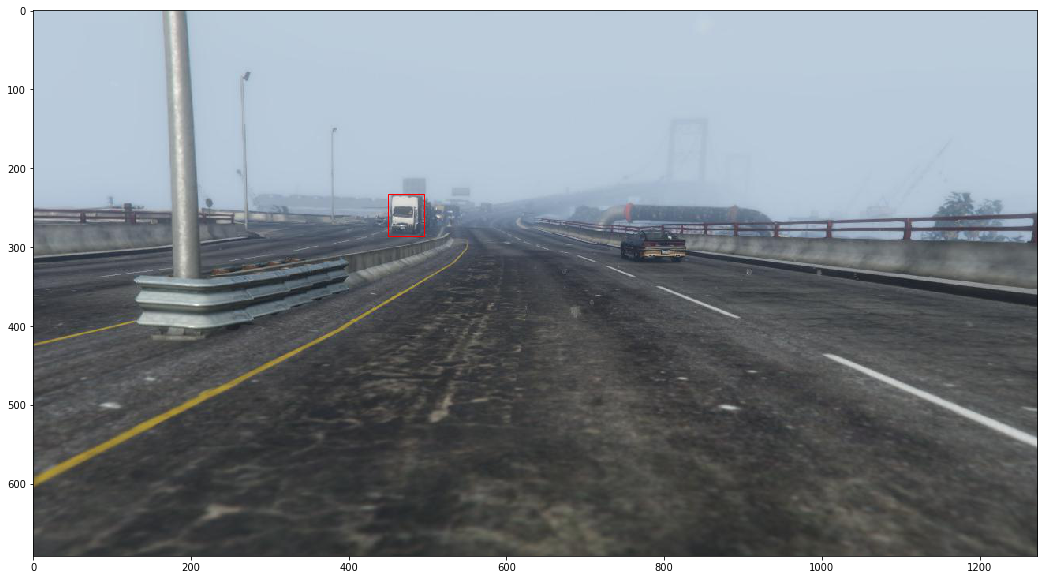

/datagrid/personal/racinmat/GTA-jpg/info-2017-11-24--19-15-58--807-0.jpg
(1274, 692)
[[ 493.60614854  283.57674873]
 [ 445.91438234  228.07582128]]


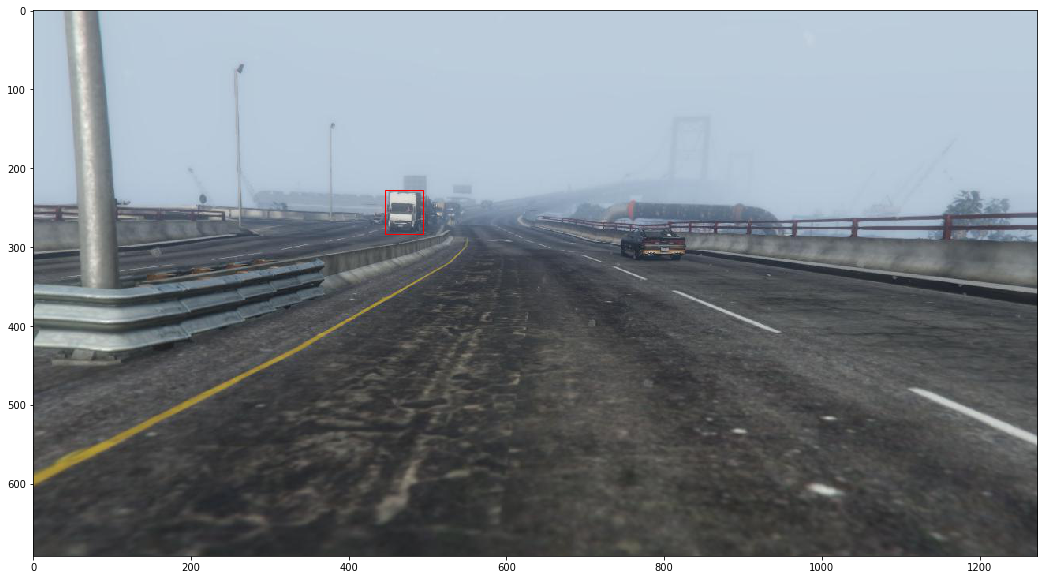

In [26]:
for car in list(cars.values())[5:6]:
    display_snapshots(car, (40, 42))

In [31]:
snapshot = car['snapshots'][0]
print(snapshot)
bbox = snapshot['bbox']
print(bbox)
pos1 = np.array(car['snapshots'][0]['position'])
pos2 = np.array(car['snapshots'][1]['position'])
pos2 - pos1

{'bbox': array([[ 0.42081422,  0.37909743],
       [ 0.40898892,  0.35006586]]), 'snapshot_id': 14032, 'detection_id': 1358627, 'position': (225.556976318359, -2666.56372070312, 18.3691101074219), 'image': '2017-11-24--19-15-43--773'}
[[ 0.42081422  0.37909743]
 [ 0.40898892  0.35006586]]


array([ 0.9256897 , -0.01220703,  0.01744652])

### Testing whether matpltolib displaying works:

In [1]:
import matplotlib
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
'DISPLAY' in os.environ

False

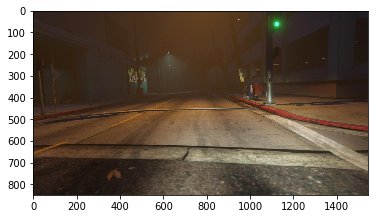

In [3]:
img_path = '/datagrid/personal/racinmat/GTA-jpg/info-2017-11-25--01-59-56--393-0.jpg'
img = Image.open(img_path)
plt.imshow(img)
plt.show()

In [16]:
exitval = os.system('python -c "import matplotlib.pyplot as plt; plt.figure()"')
exitval

0

In [6]:
arr = [1, 2, 3, 4, 5]
arr[4:5]

[5]

In [22]:
test = [0, 5]
type(test) in (list, tuple)

True